In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

In [18]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [19]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

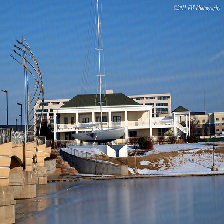

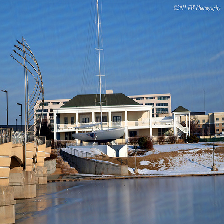

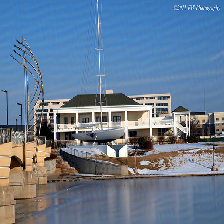

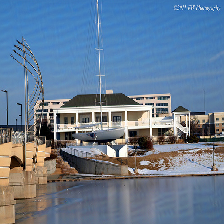

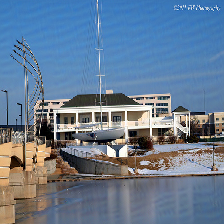

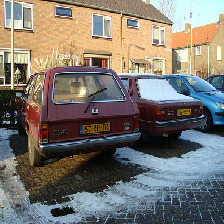

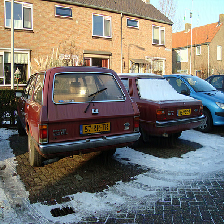

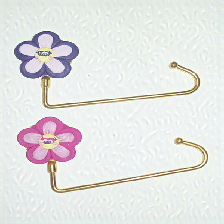

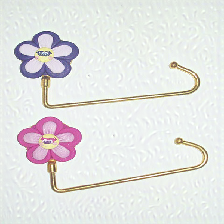

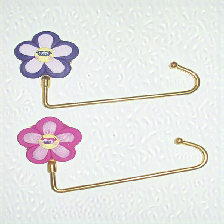

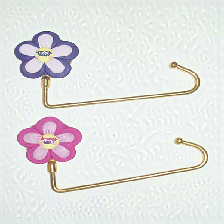

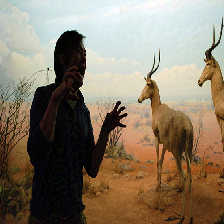

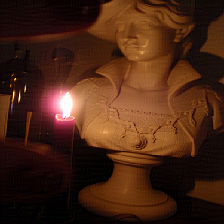

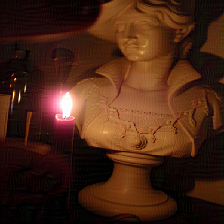

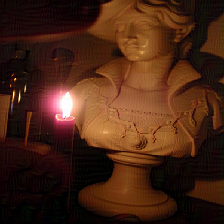

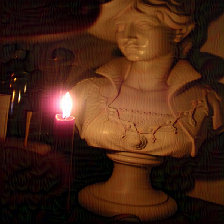

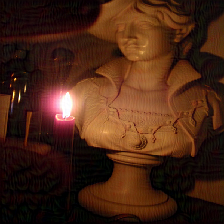

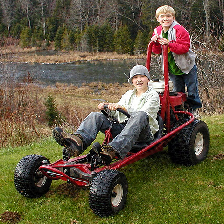

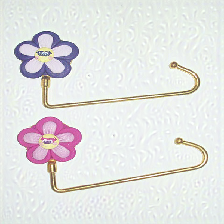

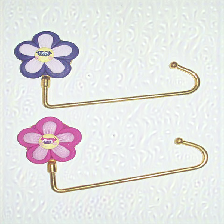

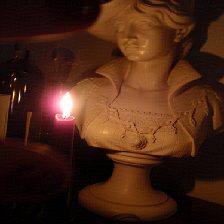

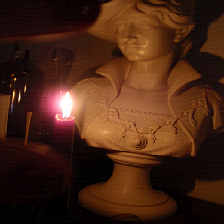

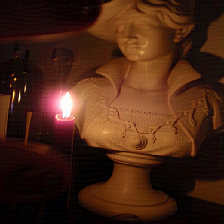

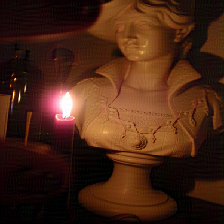

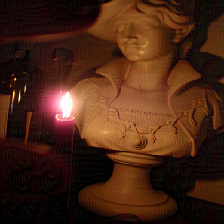

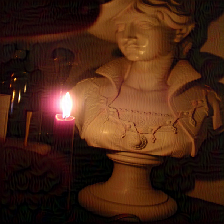

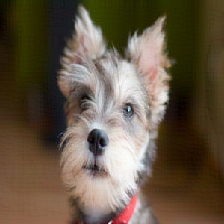

In [20]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

# The local path to our target image
from os import walk

path = "ImageNet/generated_inputs/0602/"
filenames = next(walk(path), (None, None, []))[2]  # [] if no file
for file in filenames: 
    display(Image(path + file))

1/1 [==============================] - 1s 766ms/step
Predicted: [('n03216828', 'dock', 8.3267145)]


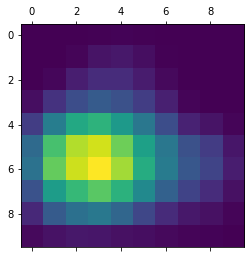

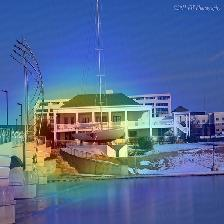

1/1 [==============================] - 1s 734ms/step
Predicted: [('n03216828', 'dock', 8.354755)]


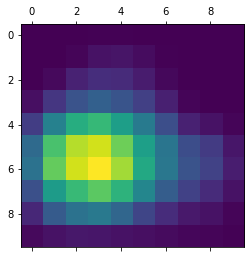

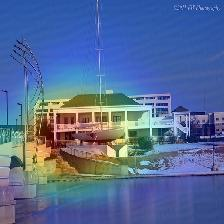

1/1 [==============================] - 1s 870ms/step
Predicted: [('n03216828', 'dock', 8.462498)]


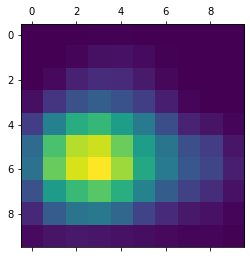

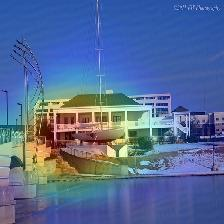

1/1 [==============================] - 1s 609ms/step
Predicted: [('n03216828', 'dock', 8.573675)]


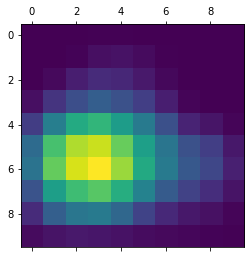

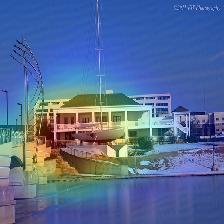

1/1 [==============================] - 1s 584ms/step
Predicted: [('n03216828', 'dock', 8.586235)]


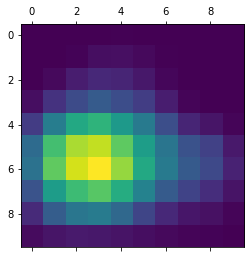

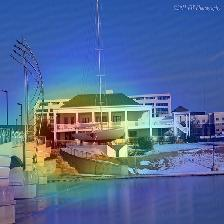

1/1 [==============================] - 1s 594ms/step
Predicted: [('n03770679', 'minivan', 8.541339)]


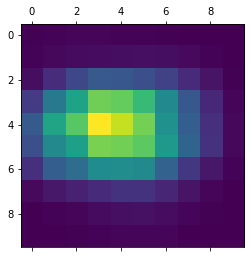

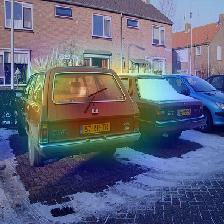

1/1 [==============================] - 1s 600ms/step
Predicted: [('n03770679', 'minivan', 8.372115)]


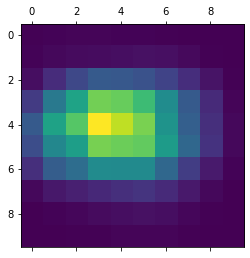

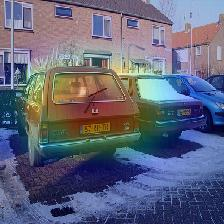

1/1 [==============================] - 1s 594ms/step
Predicted: [('n03532672', 'hook', 11.003458)]


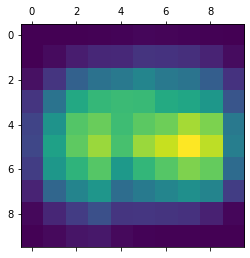

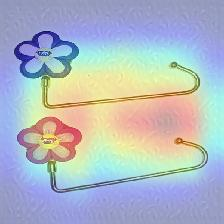

1/1 [==============================] - 1s 594ms/step
Predicted: [('n03532672', 'hook', 11.022093)]


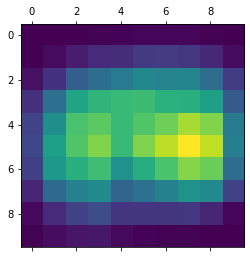

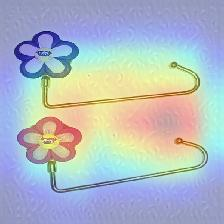

1/1 [==============================] - 1s 598ms/step
Predicted: [('n03532672', 'hook', 11.078317)]


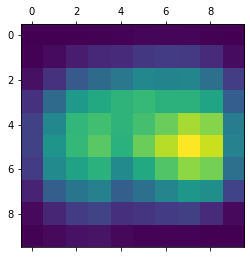

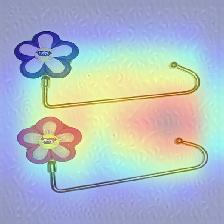

1/1 [==============================] - 1s 610ms/step
Predicted: [('n03532672', 'hook', 10.714922)]


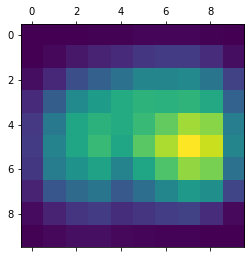

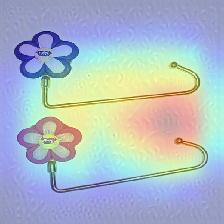

1/1 [==============================] - 1s 594ms/step
Predicted: [('n02422106', 'hartebeest', 7.2074842)]


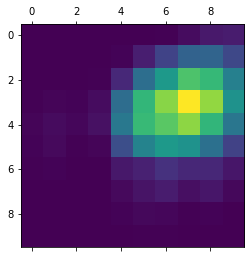

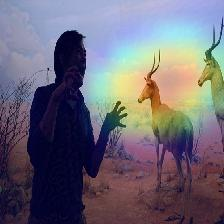

1/1 [==============================] - 1s 594ms/step
Predicted: [('n03637318', 'lampshade', 5.5633616)]


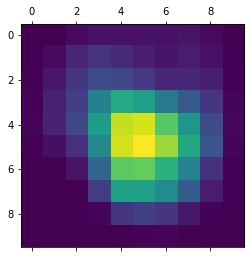

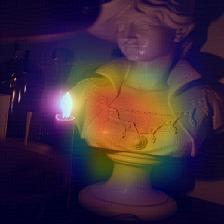

1/1 [==============================] - 1s 594ms/step
Predicted: [('n03637318', 'lampshade', 5.624706)]


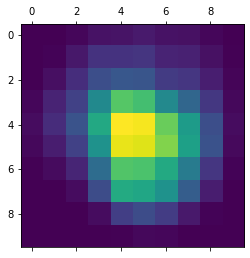

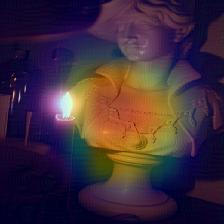

1/1 [==============================] - 1s 610ms/step
Predicted: [('n03637318', 'lampshade', 5.2343655)]


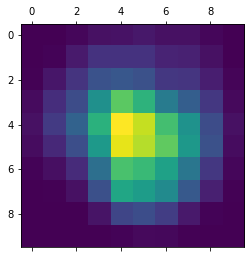

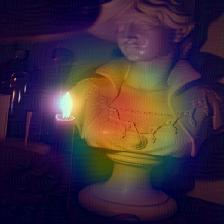

1/1 [==============================] - 1s 594ms/step
Predicted: [('n03903868', 'pedestal', 6.308239)]


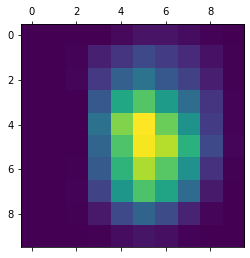

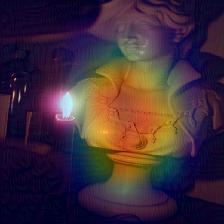

1/1 [==============================] - 1s 594ms/step
Predicted: [('n03388043', 'fountain', 6.416425)]


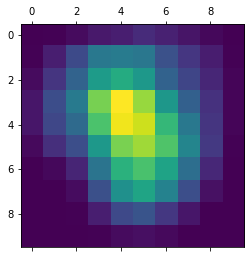

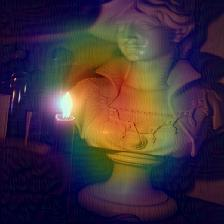

1/1 [==============================] - 1s 579ms/step
Predicted: [('n03444034', 'go-kart', 10.901219)]


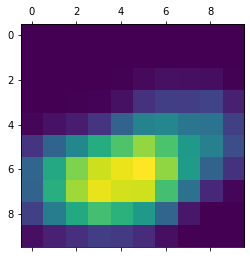

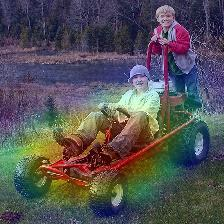

1/1 [==============================] - 1s 641ms/step
Predicted: [('n04127249', 'safety_pin', 10.095677)]


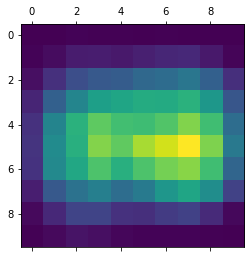

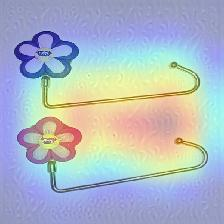

1/1 [==============================] - 1s 696ms/step
Predicted: [('n04127249', 'safety_pin', 10.59225)]


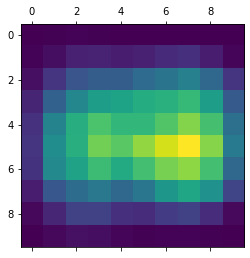

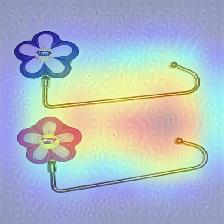

1/1 [==============================] - 1s 645ms/step
Predicted: [('n02948072', 'candle', 5.791722)]


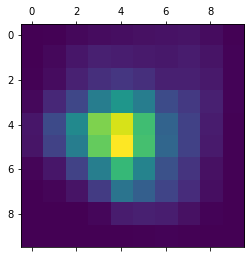

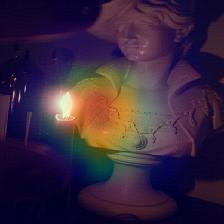

1/1 [==============================] - 1s 803ms/step
Predicted: [('n03637318', 'lampshade', 5.6819134)]


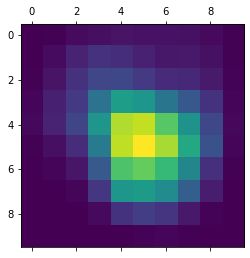

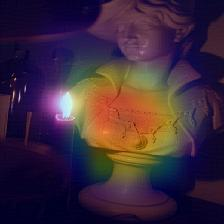

1/1 [==============================] - 1s 607ms/step
Predicted: [('n03637318', 'lampshade', 5.6894355)]


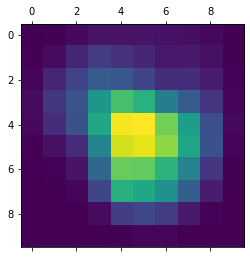

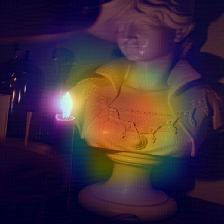

1/1 [==============================] - 1s 658ms/step
Predicted: [('n03637318', 'lampshade', 5.8408465)]


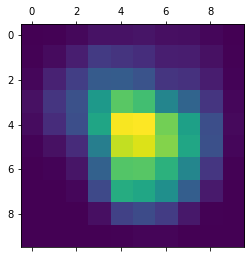

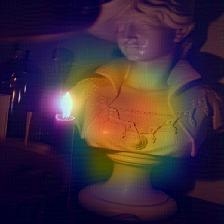

1/1 [==============================] - 1s 608ms/step
Predicted: [('n03903868', 'pedestal', 5.5088243)]


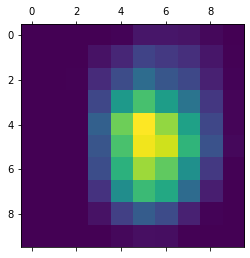

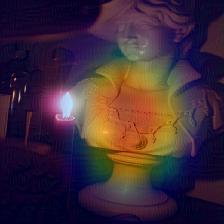

1/1 [==============================] - 1s 590ms/step
Predicted: [('n03903868', 'pedestal', 5.7329984)]


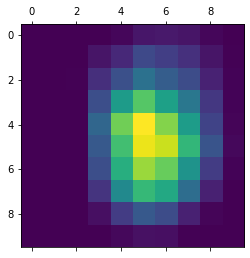

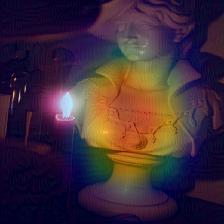

1/1 [==============================] - 1s 664ms/step
Predicted: [('n02097047', 'miniature_schnauzer', 7.6332517)]


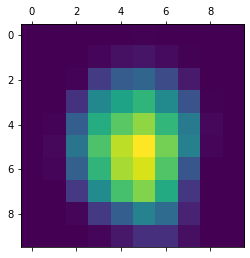

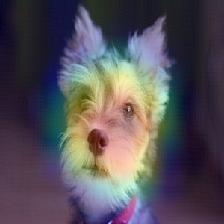

In [21]:
for file in filenames:
    # Prepare image
    img_array = preprocess_input(get_img_array(path + file, size=img_size))

    # Make model
    model = model_builder(weights="imagenet")

    # Remove last layer's softmax
    model.layers[-1].activation = None

    # Print what the top predicted class is
    preds = model.predict(img_array)
    print("Predicted:", decode_predictions(preds, top=1)[0])

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Display heatmap
    plt.matshow(heatmap)
    plt.show()
    save_and_display_gradcam(path + file, heatmap)

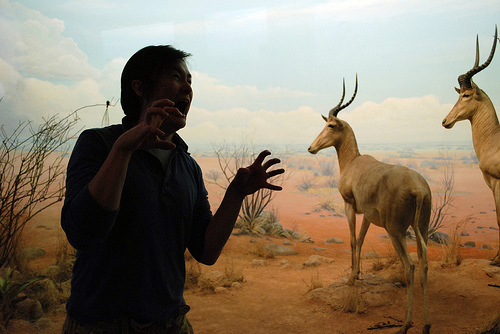

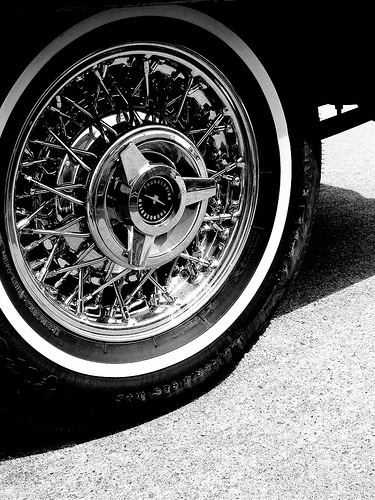

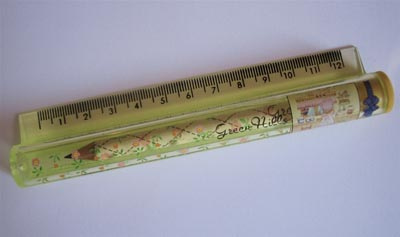

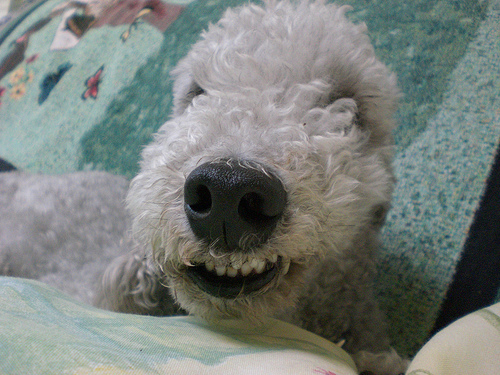

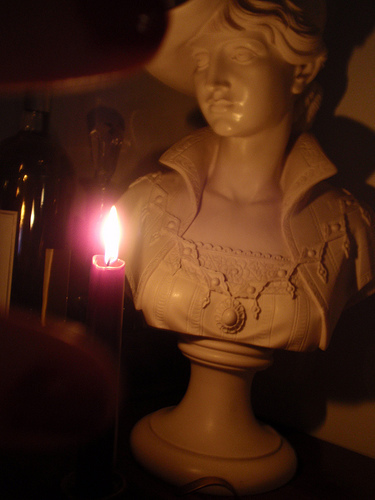

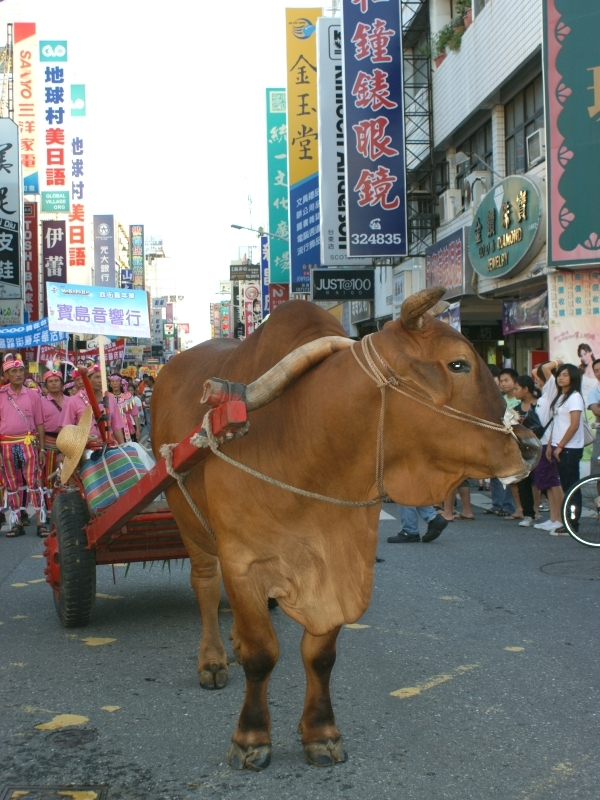

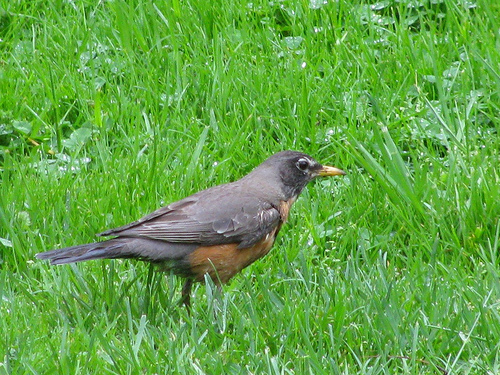

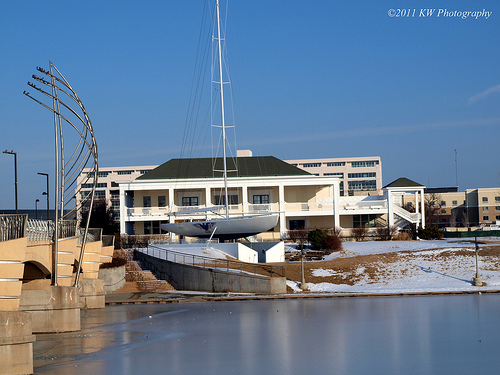

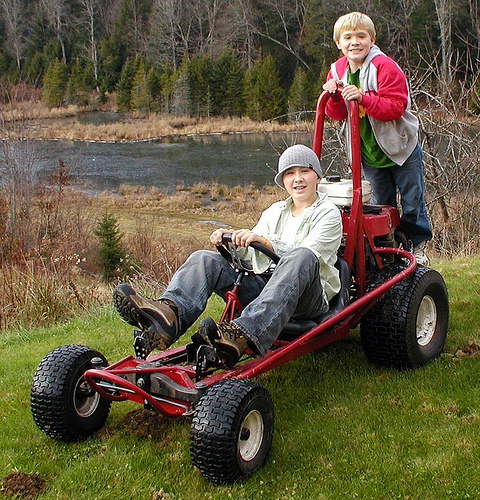

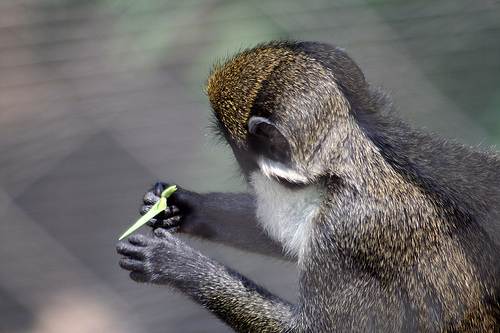

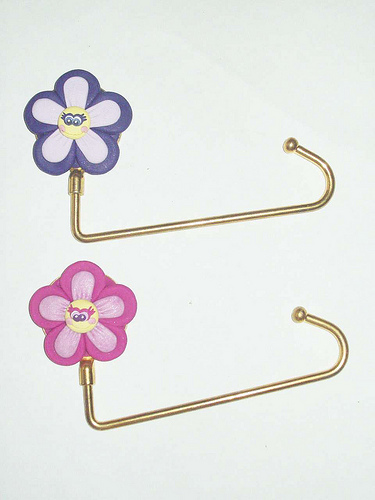

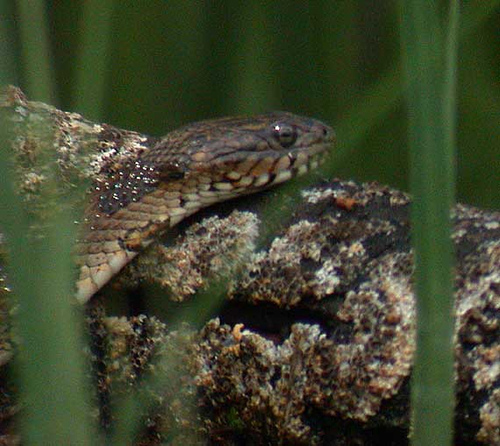

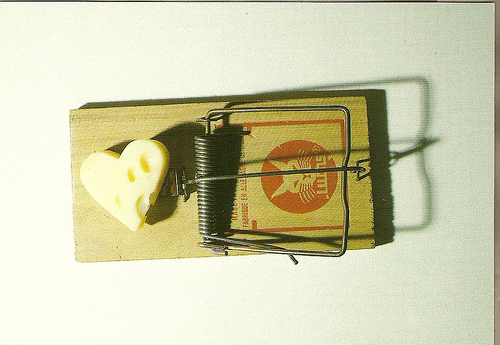

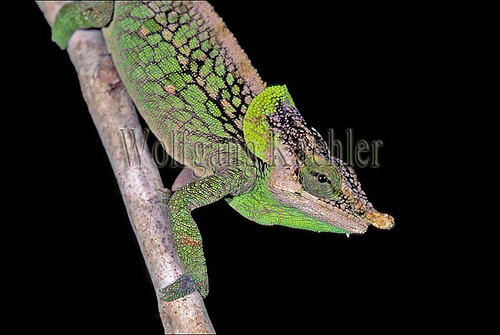

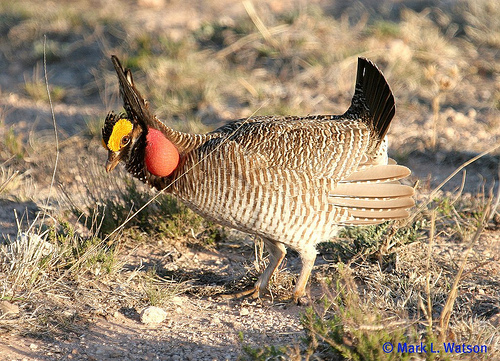

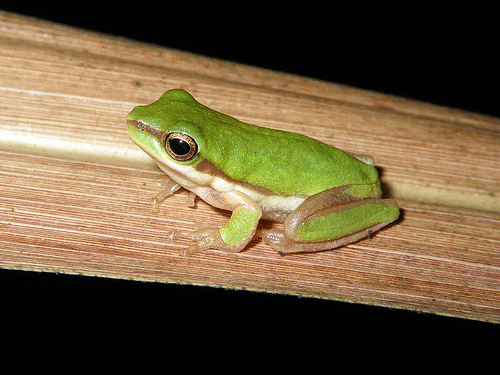

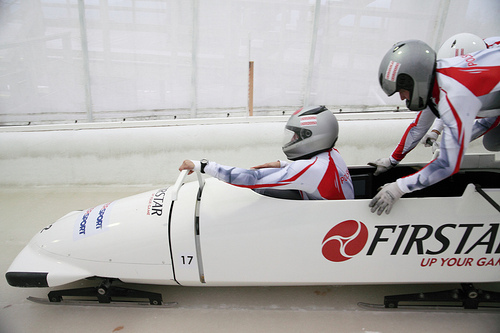

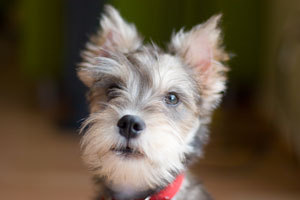

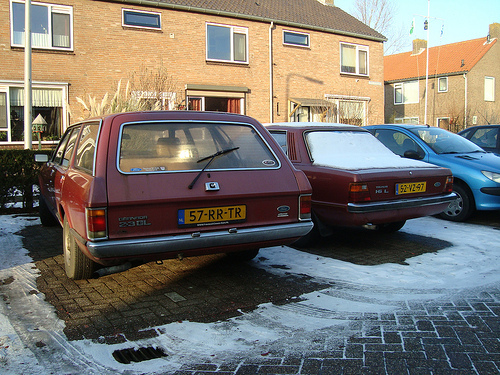

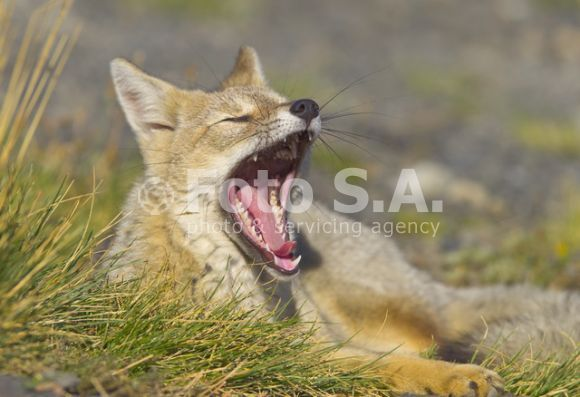

In [22]:
seeds_path = "ImageNet/seeds_20/"
seeds = next(walk(seeds_path), (None, None, []))[2]  # [] if no file
for seed in seeds: 
    display(Image(seeds_path + seed))

1/1 [==============================] - 1s 608ms/step
Predicted: [('n02422106', 'hartebeest', 7.2354307)]


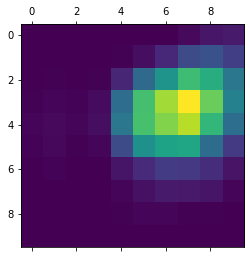

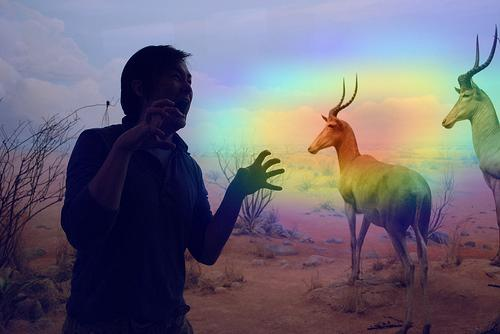

1/1 [==============================] - 1s 655ms/step
Predicted: [('n02974003', 'car_wheel', 12.967843)]


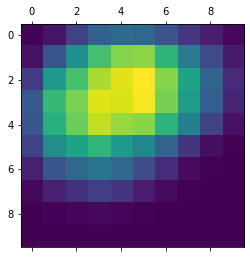

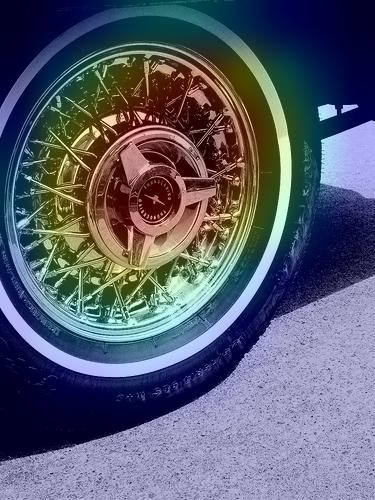

1/1 [==============================] - 1s 798ms/step
Predicted: [('n04118776', 'rule', 8.966772)]


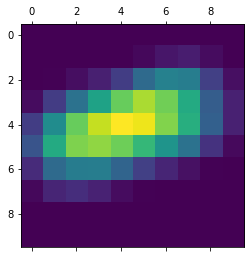

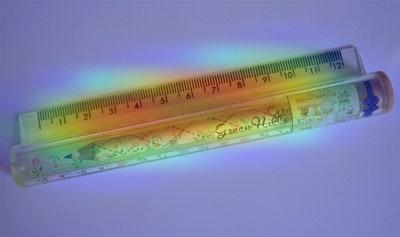

1/1 [==============================] - 1s 594ms/step
Predicted: [('n02093647', 'Bedlington_terrier', 10.425108)]


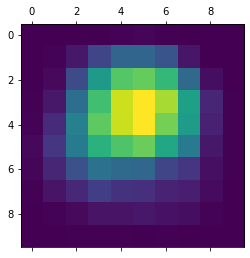

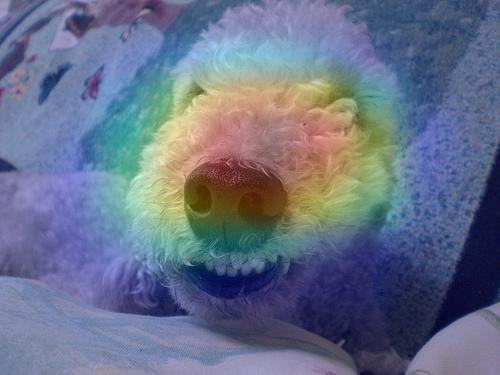

1/1 [==============================] - 1s 588ms/step
Predicted: [('n02948072', 'candle', 8.691995)]


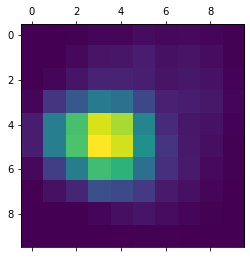

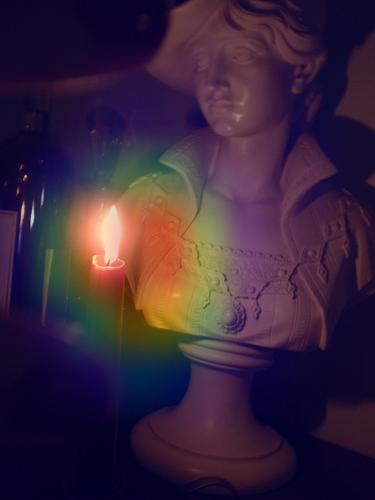

1/1 [==============================] - 1s 633ms/step
Predicted: [('n03868242', 'oxcart', 10.654316)]


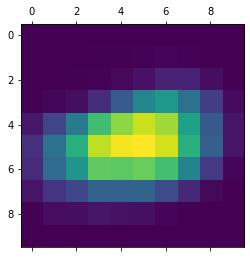

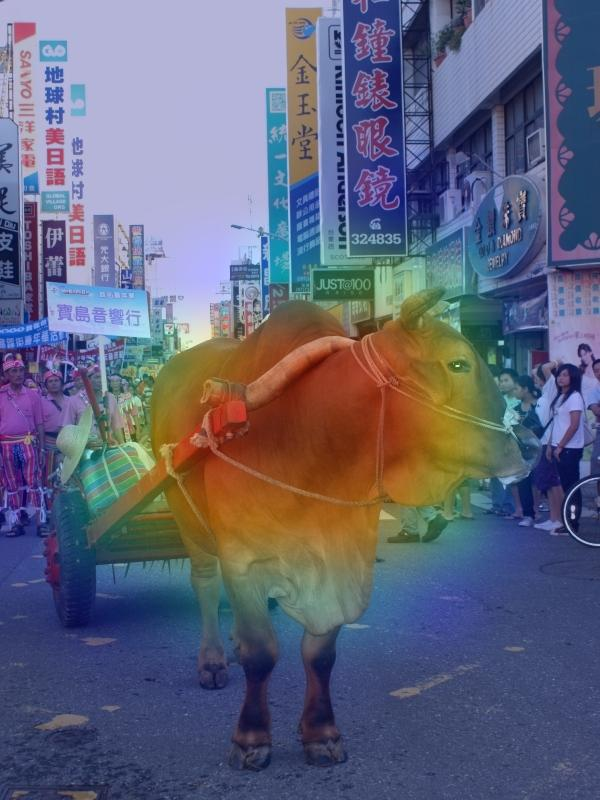

1/1 [==============================] - 1s 893ms/step
Predicted: [('n01558993', 'robin', 9.330449)]


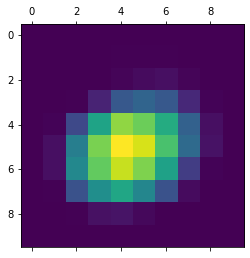

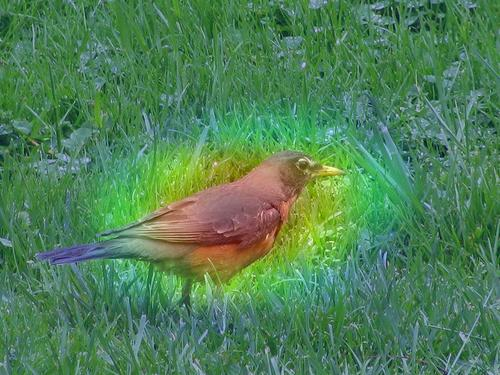

1/1 [==============================] - 1s 631ms/step
Predicted: [('n03216828', 'dock', 7.1401057)]


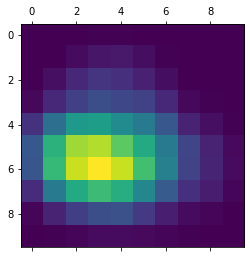

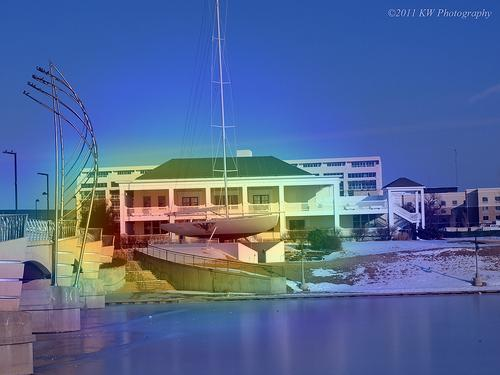

1/1 [==============================] - 1s 600ms/step
Predicted: [('n03444034', 'go-kart', 11.229288)]


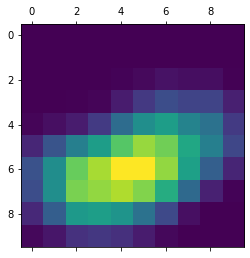

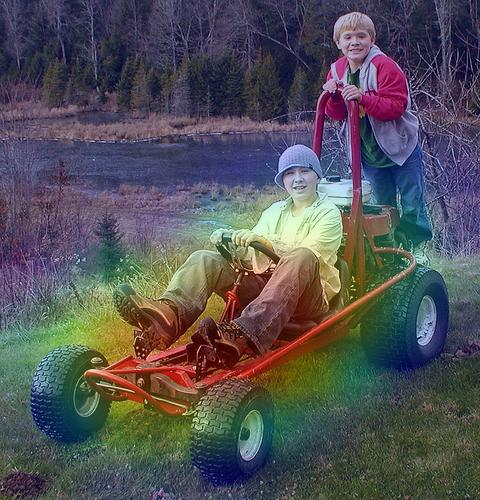

1/1 [==============================] - 1s 601ms/step
Predicted: [('n02484975', 'guenon', 12.100798)]


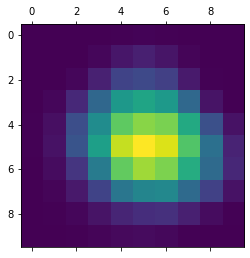

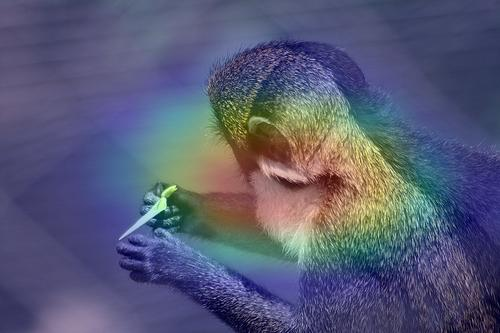

1/1 [==============================] - 1s 813ms/step
Predicted: [('n03532672', 'hook', 9.968663)]


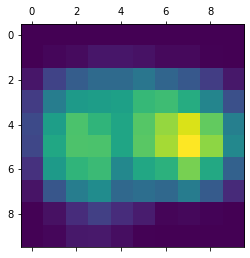

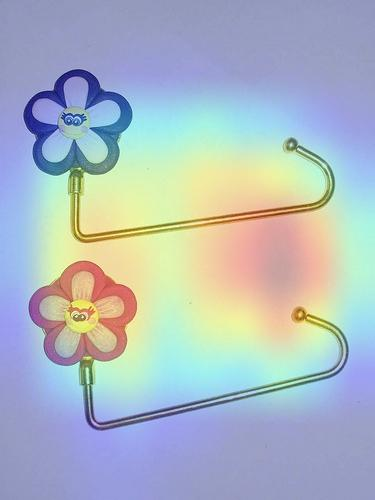

1/1 [==============================] - 1s 594ms/step
Predicted: [('n01737021', 'water_snake', 10.962894)]


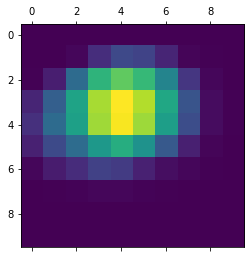

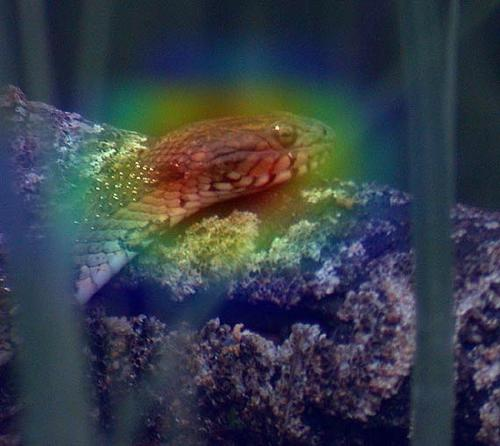

1/1 [==============================] - 1s 623ms/step
Predicted: [('n03794056', 'mousetrap', 13.458525)]


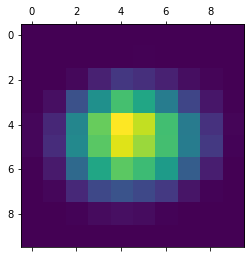

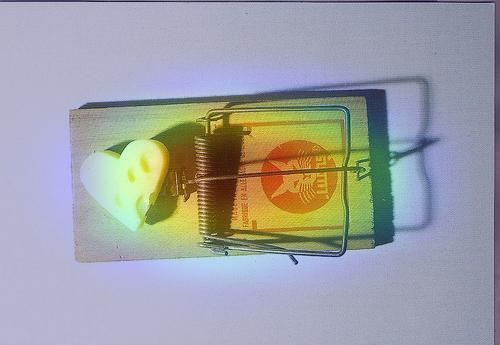

1/1 [==============================] - 1s 578ms/step
Predicted: [('n01694178', 'African_chameleon', 9.600097)]


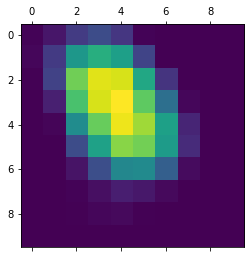

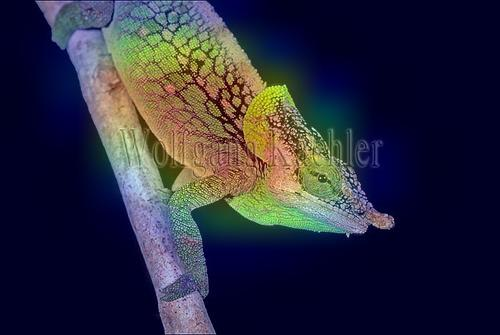

1/1 [==============================] - 1s 927ms/step
Predicted: [('n01798484', 'prairie_chicken', 10.466907)]


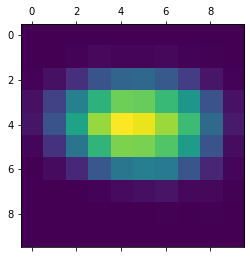

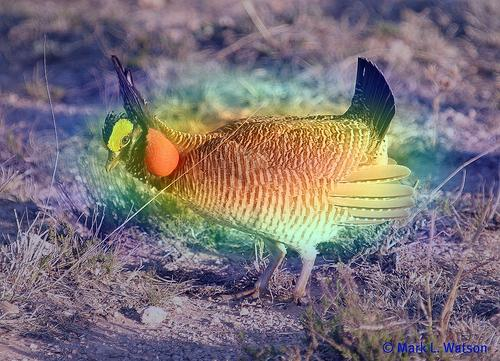

1/1 [==============================] - 1s 709ms/step
Predicted: [('n01644373', 'tree_frog', 10.3436)]


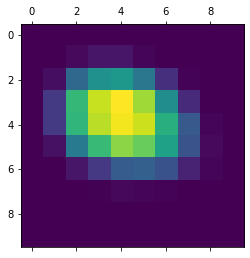

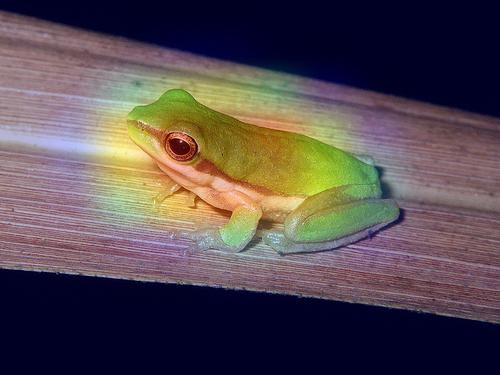

1/1 [==============================] - 1s 673ms/step
Predicted: [('n02860847', 'bobsled', 10.703515)]


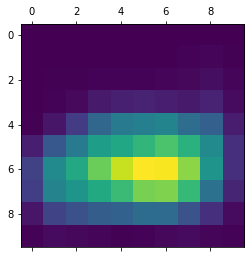

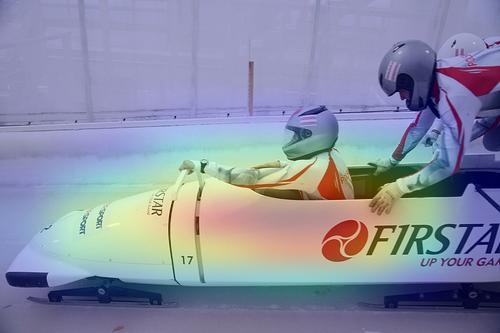

1/1 [==============================] - 1s 688ms/step
Predicted: [('n02097047', 'miniature_schnauzer', 8.607621)]


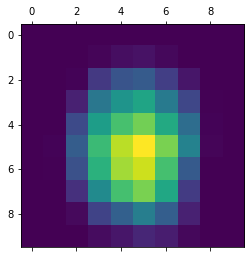

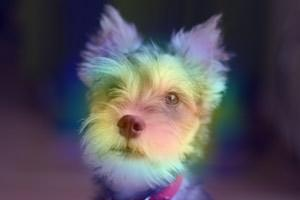

1/1 [==============================] - 1s 830ms/step
Predicted: [('n03770679', 'minivan', 10.781573)]


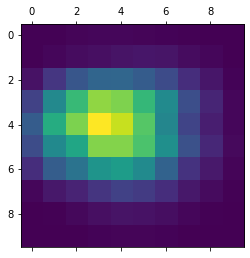

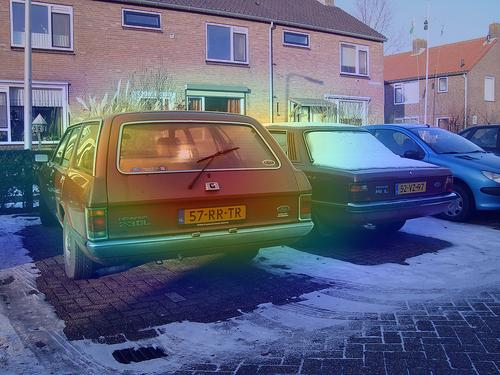

1/1 [==============================] - 1s 626ms/step
Predicted: [('n02119789', 'kit_fox', 8.817557)]


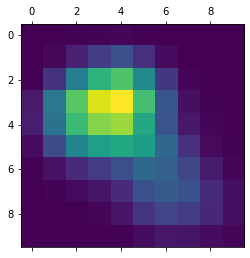

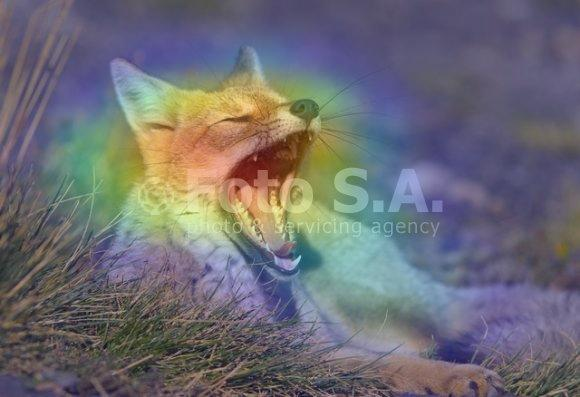

In [23]:
for seed in seeds:
    # Prepare image
    img_array = preprocess_input(get_img_array(seeds_path + seed, size=img_size))

    # Make model
    model = model_builder(weights="imagenet")

    # Remove last layer's softmax
    model.layers[-1].activation = None

    # Print what the top predicted class is
    preds = model.predict(img_array)
    print("Predicted:", decode_predictions(preds, top=1)[0])

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Display heatmap
    plt.matshow(heatmap)
    plt.show()
    save_and_display_gradcam(seeds_path + seed, heatmap)